In [27]:
from langchain.agents import create_agent
from langgraph.checkpoint.memory import InMemorySaver  
from langchain.tools import tool, ToolRuntime

@tool
def get_user_info(
    runtime: ToolRuntime
) -> str:
    """Look up user info."""
    user_id = runtime.state.get("user_id", "user_123")
    return "User is John Smith" if user_id == "user_123" else "Unknown user"

memory = InMemorySaver()
agent = create_agent(
    "ollama:qwen3:latest",
    tools=[get_user_info],
    checkpointer=memory,  
)

agent.invoke(
    {"messages": [{"role": "user", "content": "Hi! My name is Bob."}]},
    {"configurable": {"thread_id": "2"}},  
)

{'messages': [HumanMessage(content='Hi! My name is Bob.', additional_kwargs={}, response_metadata={}, id='07dc8000-177d-473c-8d2b-8818cc1abf89'),
  AIMessage(content='<think>\nOkay, the user said, "Hi! My name is Bob." Let me see how to respond.\n\nFirst, I need to acknowledge their greeting. Since they introduced themselves, I should greet them back and maybe ask how they\'re doing. The tools provided include a function called get_user_info, which looks up user info. But in this case, the user is just stating their name, not asking for information. So maybe I don\'t need to call any function here. The response should be friendly and open-ended. Let me check if there\'s any reason to use the tool. The function\'s purpose is to look up user info, but the user hasn\'t asked for anything. So probably, just a simple reply is better. I\'ll respond with a greeting and offer assistance.\n</think>\n\nHello, Bob! Nice to meet you. How are you doing today? I\'m here to help with anything you nee

In [12]:
memory.get_tuple({"configurable": {"thread_id": "1"}})


CheckpointTuple(config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f100523-03a1-60a4-8001-af81fdbdbf5e'}}, checkpoint={'v': 4, 'ts': '2026-02-02T16:14:02.162579+00:00', 'id': '1f100523-03a1-60a4-8001-af81fdbdbf5e', 'channel_versions': {'__start__': '00000000000000000000000000000002.0.7689433332555106', 'messages': '00000000000000000000000000000003.0.5017948082682547', 'branch:to:model': '00000000000000000000000000000003.0.5017948082682547'}, 'versions_seen': {'__input__': {}, '__start__': {'__start__': '00000000000000000000000000000001.0.7469684510928007'}, 'model': {'branch:to:model': '00000000000000000000000000000002.0.7689433332555106'}}, 'updated_channels': ['messages'], 'channel_values': {'messages': [HumanMessage(content='Hi! My name is Bob.', additional_kwargs={}, response_metadata={}, id='e17b38e7-7af4-42b7-998c-ebebd357708d'), AIMessage(content='<think>\nOkay, the user said, "Hi! My name is Bob." Let me see how to respond.\n\nFirst, I need to ac

In [13]:
agent.invoke(
    {"messages": [{"role": "user", "content": "What is my name?"}]},
    {"configurable": {"thread_id": "1"}},  
)

{'messages': [HumanMessage(content='Hi! My name is Bob.', additional_kwargs={}, response_metadata={}, id='e17b38e7-7af4-42b7-998c-ebebd357708d'),
  AIMessage(content='<think>\nOkay, the user said, "Hi! My name is Bob." Let me see how to respond.\n\nFirst, I need to acknowledge their greeting. Since they introduced themselves, I should respond politely. Maybe say hello and ask how they\'re doing. But wait, the tools provided include a function called get_user_info. Should I use that here?\n\nLooking at the function definition, get_user_info is supposed to look up user info, but the parameters are empty. The user hasn\'t provided any specific information beyond their name. Maybe the function is meant to retrieve more details, but since the user hasn\'t given any other data, there\'s nothing to fetch. \n\nSo, perhaps I shouldn\'t call the function right now. The user is just introducing themselves, so the appropriate response is to greet them back and offer assistance. No need to trigger 

In [15]:
checkpointTuple = memory.get_tuple({"configurable": {"thread_id": "1"}})


In [19]:
checkpointTuple

CheckpointTuple(config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f100524-8e31-68f8-8004-4bd1e04edbc9'}}, checkpoint={'v': 4, 'ts': '2026-02-02T16:14:43.535669+00:00', 'id': '1f100524-8e31-68f8-8004-4bd1e04edbc9', 'channel_versions': {'__start__': '00000000000000000000000000000005.0.4802294504052391', 'messages': '00000000000000000000000000000006.0.40206598589400755', 'branch:to:model': '00000000000000000000000000000006.0.40206598589400755'}, 'versions_seen': {'__input__': {}, '__start__': {'__start__': '00000000000000000000000000000004.0.9178731548781929'}, 'model': {'branch:to:model': '00000000000000000000000000000005.0.4802294504052391'}}, 'updated_channels': ['messages'], 'channel_values': {'messages': [HumanMessage(content='Hi! My name is Bob.', additional_kwargs={}, response_metadata={}, id='e17b38e7-7af4-42b7-998c-ebebd357708d'), AIMessage(content='<think>\nOkay, the user said, "Hi! My name is Bob." Let me see how to respond.\n\nFirst, I need to 

In [20]:
checkpointTuple.checkpoint

{'v': 4,
 'ts': '2026-02-02T16:14:43.535669+00:00',
 'id': '1f100524-8e31-68f8-8004-4bd1e04edbc9',
 'channel_versions': {'__start__': '00000000000000000000000000000005.0.4802294504052391',
  'messages': '00000000000000000000000000000006.0.40206598589400755',
  'branch:to:model': '00000000000000000000000000000006.0.40206598589400755'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000004.0.9178731548781929'},
  'model': {'branch:to:model': '00000000000000000000000000000005.0.4802294504052391'}},
 'updated_channels': ['messages'],
 'channel_values': {'messages': [HumanMessage(content='Hi! My name is Bob.', additional_kwargs={}, response_metadata={}, id='e17b38e7-7af4-42b7-998c-ebebd357708d'),
   AIMessage(content='<think>\nOkay, the user said, "Hi! My name is Bob." Let me see how to respond.\n\nFirst, I need to acknowledge their greeting. Since they introduced themselves, I should respond politely. Maybe say hello and ask how they\'re doing. 

In [35]:
checkpointList = memory.list({"configurable": {"thread_id": "2"}})
list(checkpointList)[0].checkpoint


{'v': 4,
 'ts': '2026-02-03T02:01:17.333853+00:00',
 'id': '1f100a43-a068-66ce-8001-0a238ef12ece',
 'channel_versions': {'__start__': '00000000000000000000000000000002.0.5639781755203376',
  'messages': '00000000000000000000000000000003.0.00295297312966758',
  'branch:to:model': '00000000000000000000000000000003.0.00295297312966758'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000001.0.38014315705356516'},
  'model': {'branch:to:model': '00000000000000000000000000000002.0.5639781755203376'}},
 'updated_channels': ['messages'],
 'channel_values': {'messages': [HumanMessage(content='Hi! My name is Bob.', additional_kwargs={}, response_metadata={}, id='07dc8000-177d-473c-8d2b-8818cc1abf89'),
   AIMessage(content='<think>\nOkay, the user said, "Hi! My name is Bob." Let me see how to respond.\n\nFirst, I need to acknowledge their greeting. Since they introduced themselves, I should greet them back and maybe ask how they\'re doing. The tools p

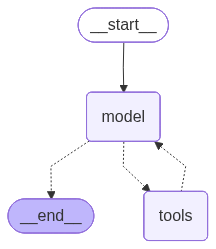

In [26]:
agent

In [9]:
# 2. 自定义 AgentState
from langchain.agents import AgentState, create_agent
from langchain.tools import tool, ToolRuntime
from langgraph.checkpoint.memory import InMemorySaver 

class CustomAgentState(AgentState):
    user_id: str = ""
    preferences: dict = {}

@tool
def get_user_info(
    runtime: ToolRuntime
) -> str:
    """Look up user info."""
    user_id = runtime.state.get("user_id", "user_123")
    return "User is John Smith" if user_id == "user_123" else "Unknown user"

memory = InMemorySaver()

agent = create_agent(
    "ollama:qwen3",
    tools=[get_user_info],
    checkpointer=memory,  
    state_schema=CustomAgentState,
)

result = agent.invoke(
    {
        "messages": [{"role": "user", "content": "Hi! My name is Bob."}],
        "user_id": "大小寒",
        "preferences": {"language": "zh-CN"},
    },
    {"configurable": {"thread_id": "x01"}},  
)
result





{'messages': [HumanMessage(content='Hi! My name is Bob.', additional_kwargs={}, response_metadata={}, id='bf561db9-d6a7-4f9d-8c60-14216902ef13'),
  AIMessage(content="<think>\nOkay, the user introduced themselves as Bob. Let me check the tools available. There's a function called get_user_info, but it doesn't take any arguments. Since the user provided their name, maybe I should call get_user_info to retrieve more details about Bob. However, the function's description says it looks up user info, but there's no parameters specified. Wait, maybe the function is supposed to use the user's name from the context? But the parameters are empty. Hmm, perhaps there's a mistake in the tool definition. Since the function doesn't take arguments, I can't pass Bob's name to it. Maybe the function is intended to be used without parameters, but in this case, the user provided their name. I should call the function anyway, even if it doesn't use the name. Let me proceed with the tool call.\n</think>\n\

In [26]:
import json

checkpointList = list(memory.list({"configurable": {"thread_id": "x01"}}))
# print(json.dumps(checkpointList[4], indent=2))
checkpointList[4]


CheckpointTuple(config={'configurable': {'thread_id': 'x01', 'checkpoint_ns': '', 'checkpoint_id': '1f101150-41b6-6090-bfff-23cd0d3c3c3e'}}, checkpoint={'v': 4, 'ts': '2026-02-03T15:28:40.004005+00:00', 'id': '1f101150-41b6-6090-bfff-23cd0d3c3c3e', 'channel_versions': {'__start__': '00000000000000000000000000000001.0.3413369827670716'}, 'versions_seen': {'__input__': {}}, 'updated_channels': ['__start__'], 'channel_values': {'__start__': {'messages': [{'role': 'user', 'content': 'Hi! My name is Bob.'}], 'user_id': '大小寒', 'preferences': {'language': 'zh-CN'}}}}, metadata={'source': 'input', 'step': -1, 'parents': {}}, parent_config=None, pending_writes=[('229161f0-a1e7-0bf0-e944-a489adbc62ab', 'messages', [{'role': 'user', 'content': 'Hi! My name is Bob.'}]), ('229161f0-a1e7-0bf0-e944-a489adbc62ab', 'user_id', '大小寒'), ('229161f0-a1e7-0bf0-e944-a489adbc62ab', 'preferences', {'language': 'zh-CN'}), ('229161f0-a1e7-0bf0-e944-a489adbc62ab', 'branch:to:model', None)])

In [21]:
print(checkpointList[3])

CheckpointTuple(config={'configurable': {'thread_id': 'x01', 'checkpoint_ns': '', 'checkpoint_id': '1f101150-41b7-659e-8000-c52bba875712'}}, checkpoint={'v': 4, 'ts': '2026-02-03T15:28:40.004542+00:00', 'id': '1f101150-41b7-659e-8000-c52bba875712', 'channel_versions': {'__start__': '00000000000000000000000000000002.0.22685524083287145', 'messages': '00000000000000000000000000000002.0.22685524083287145', 'user_id': '00000000000000000000000000000002.0.22685524083287145', 'preferences': '00000000000000000000000000000002.0.22685524083287145', 'branch:to:model': '00000000000000000000000000000002.0.22685524083287145'}, 'versions_seen': {'__input__': {}, '__start__': {'__start__': '00000000000000000000000000000001.0.3413369827670716'}}, 'updated_channels': ['branch:to:model', 'messages', 'preferences', 'user_id'], 'channel_values': {'messages': [HumanMessage(content='Hi! My name is Bob.', additional_kwargs={}, response_metadata={}, id='bf561db9-d6a7-4f9d-8c60-14216902ef13')], 'user_id': '大小寒'

In [22]:
print(checkpointList[2])

CheckpointTuple(config={'configurable': {'thread_id': 'x01', 'checkpoint_ns': '', 'checkpoint_id': '1f101150-a4a5-6b10-8001-24135859f044'}}, checkpoint={'v': 4, 'ts': '2026-02-03T15:28:50.378186+00:00', 'id': '1f101150-a4a5-6b10-8001-24135859f044', 'channel_versions': {'__start__': '00000000000000000000000000000002.0.22685524083287145', 'messages': '00000000000000000000000000000003.0.4612918867736421', 'user_id': '00000000000000000000000000000002.0.22685524083287145', 'preferences': '00000000000000000000000000000002.0.22685524083287145', 'branch:to:model': '00000000000000000000000000000003.0.4612918867736421', '__pregel_tasks': '00000000000000000000000000000003.0.4612918867736421'}, 'versions_seen': {'__input__': {}, '__start__': {'__start__': '00000000000000000000000000000001.0.3413369827670716'}, 'model': {'branch:to:model': '00000000000000000000000000000002.0.22685524083287145'}}, 'updated_channels': ['__pregel_tasks', 'messages'], 'channel_values': {'messages': [HumanMessage(conten

In [23]:
print(checkpointList[1])

CheckpointTuple(config={'configurable': {'thread_id': 'x01', 'checkpoint_ns': '', 'checkpoint_id': '1f101150-a4ab-6f24-8002-c507f4c14f03'}}, checkpoint={'v': 4, 'ts': '2026-02-03T15:28:50.380756+00:00', 'id': '1f101150-a4ab-6f24-8002-c507f4c14f03', 'channel_versions': {'__start__': '00000000000000000000000000000002.0.22685524083287145', 'messages': '00000000000000000000000000000004.0.5934409070514958', 'user_id': '00000000000000000000000000000002.0.22685524083287145', 'preferences': '00000000000000000000000000000002.0.22685524083287145', 'branch:to:model': '00000000000000000000000000000004.0.5934409070514958', '__pregel_tasks': '00000000000000000000000000000004.0.5934409070514958'}, 'versions_seen': {'__input__': {}, '__start__': {'__start__': '00000000000000000000000000000001.0.3413369827670716'}, 'model': {'branch:to:model': '00000000000000000000000000000002.0.22685524083287145'}, 'tools': {}}, 'updated_channels': ['branch:to:model', 'messages'], 'channel_values': {'messages': [Human

In [24]:
print(checkpointList[0])

CheckpointTuple(config={'configurable': {'thread_id': 'x01', 'checkpoint_ns': '', 'checkpoint_id': '1f101150-ae34-61d6-8003-c86acd9245bc'}}, checkpoint={'v': 4, 'ts': '2026-02-03T15:28:51.380244+00:00', 'id': '1f101150-ae34-61d6-8003-c86acd9245bc', 'channel_versions': {'__start__': '00000000000000000000000000000002.0.22685524083287145', 'messages': '00000000000000000000000000000005.0.9668468545710784', 'user_id': '00000000000000000000000000000002.0.22685524083287145', 'preferences': '00000000000000000000000000000002.0.22685524083287145', 'branch:to:model': '00000000000000000000000000000005.0.9668468545710784', '__pregel_tasks': '00000000000000000000000000000004.0.5934409070514958'}, 'versions_seen': {'__input__': {}, '__start__': {'__start__': '00000000000000000000000000000001.0.3413369827670716'}, 'model': {'branch:to:model': '00000000000000000000000000000004.0.5934409070514958'}, 'tools': {}}, 'updated_channels': ['messages'], 'channel_values': {'messages': [HumanMessage(content='Hi!